In [1]:
import numpy as np
import cv2
import mediapipe as mp
import tensorflow as tf
import pandas as pd

In [84]:
model = tf.keras.models.load_model('../..//ML/Recognition/Model/FER_LM_v1.keras')

In [85]:
label_mapping = {
    0: 0,  # Anger (CK+) to Angry (FER2013)
    1: 1,  # Disgust (CK+) to Disgust (FER2013)
    2: 2,  # Fear (CK+) to Fear (FER2013)
    3: 3,  # Happiness (CK+) to Happy (FER2013)
    4: 5,  # Sadness (CK+) to Sad (FER2013)
    5: 6,  # Surprise (CK+) to Surprise (FER2013)
    6: 4   # Neutral (CK+) to Neutral (FER2013)
}

In [86]:
data = pd.read_csv('../../Dataset/CK+/ckextended.csv')

In [87]:
data = data[data['emotion'] != 7]
data['emotion'] = data['emotion'].map(label_mapping)

In [88]:
data[data['emotion']==0]

,emotion,pixels,Usage
680,0,3 0 2 1 4 7 7 6 11 33 50 83 92 94 100 101 112 ...,Training
681,0,4 16 15 13 11 20 30 36 25 25 36 69 83 117 149 ...,Training
682,0,64 66 70 72 67 35 18 10 20 37 65 78 104 127 15...,Training
683,0,41 46 21 5 2 2 2 0 1 0 79 121 130 140 150 154 ...,Training
684,0,215 214 212 215 218 217 210 56 52 60 67 57 58 ...,Training
685,0,46 5 3 7 11 13 12 13 2 7 16 13 16 10 20 23 23 ...,Training
686,0,248 59 47 51 49 73 83 83 75 67 53 41 61 80 79 ...,Training
687,0,33 29 27 39 45 30 32 19 26 32 61 108 139 176 2...,Training
688,0,146 103 87 64 61 66 70 77 120 162 114 121 127 ...,Training
689,0,163 111 41 41 36 35 43 43 45 65 80 87 102 149 ...,Training


In [89]:
val_data = data[data['Usage']=='PrivateTest']
train_data = data[data['Usage']=='Training']
test_data = data[data['Usage']=='PublicTest']

In [90]:
test_data = test_data.drop('Usage', axis=1)
train_data = train_data.drop('Usage', axis=1)
val_data = val_data.drop('Usage', axis=1)

In [91]:
import matplotlib.pyplot as plt
def convert_to_image(data):
    images = []

    # Process each row in the DataFrame
    for index, row in data.iterrows():
        # Convert pixel string to numpy array
        pixel_values = np.array(row['pixels'].split(), dtype=np.uint8)
        
        # Reshape to 48x48 matrix
        image_array = pixel_values.reshape(48, 48)
        
        # Add the image to the list
        images.append(image_array)

    return images

In [92]:
test_image = convert_to_image(test_data)
train_image = convert_to_image(train_data)
val_image = convert_to_image(val_data)

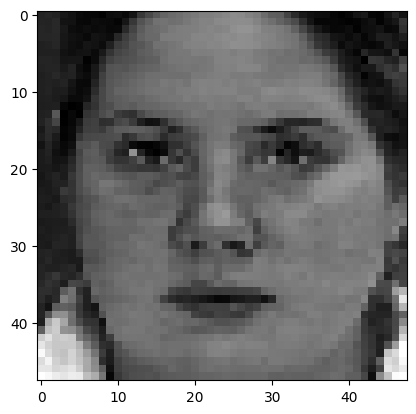

In [93]:
plt.imshow(train_image[0], cmap='gray')
plt.show()

In [94]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

In [95]:
def landmark_extraction(images):
    landmarks_list = []

    for image in images:
        # Convert grayscale image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        # Process the image to find landmarks
        results = face_mesh.process(image_rgb)

        # Check if landmarks are found and append them to the list
        if results.multi_face_landmarks:
                face_landmarks = results.multi_face_landmarks[0]
                landmarks = [(landmark.x, landmark.y, landmark.z) for landmark in face_landmarks.landmark]
                landmarks_list.append(landmarks)

    return landmarks_list

In [96]:
test_landmarks = landmark_extraction(test_image)
train_landmarks = landmark_extraction(train_image)
val_landmarks = landmark_extraction(val_image)

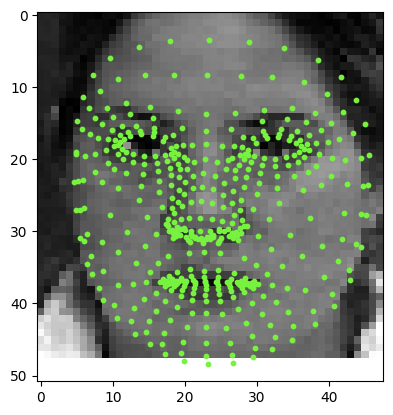

In [99]:
plt.imshow(train_image[0], cmap='gray')

# Overlay landmarks on the first image
for landmark in train_landmarks[0]:
    x = landmark[0] * 48  # Multiply by image width
    y = landmark[1] * 48  # Multiply by image height
    plt.scatter(x, y, c='#77f23f', s=10)  # Red dot for each landmark

plt.show()

In [100]:
def flattening_landmark(landmarks_list):
    flattened_landmarks = []

    for landmarks in landmarks_list:
        # Flatten the array
        flattened = np.array(landmarks).flatten()
        
        # Append to the list
        flattened_landmarks.append(flattened)

    return flattened_landmarks

In [101]:
test_flatten_landmarks = flattening_landmark(test_landmarks)
train_flatten_landmarks = flattening_landmark(train_landmarks)
val_flatten_landmarks = flattening_landmark(val_landmarks)

In [116]:
np.array(test_flatten_landmarks).shape[1]

1404

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_features_scaled = scaler.fit_transform(np.array(test_flatten_landmarks))
train_features_scaled = scaler.fit_transform(np.array(train_flatten_landmarks))
val_features_scaled = scaler.fit_transform(np.array(val_flatten_landmarks))

In [117]:
test_features_scaled.shape[1]

1404

In [104]:
train_labels = np.array(train_data['emotion'].values)
test_labels = np.array(test_data['emotion'].values)
val_labels = np.array(val_data['emotion'].values)

In [105]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)

In [106]:
history = model.fit(train_features_scaled,train_labels,validation_data=(val_features_scaled,val_labels), epochs=90, batch_size=32, callbacks=[early_stopping])

Epoch 1/90


23/23 [==============================] - 3s 29ms/step - loss: 1.4374 - accuracy: 0.5694 - val_loss: 1.2400 - val_accuracy: 0.7097
Epoch 2/90
23/23 [==============================] - 0s 8ms/step - loss: 0.8775 - accuracy: 0.7444 - val_loss: 0.8082 - val_accuracy: 0.7957
Epoch 3/90
23/23 [==============================] - 0s 8ms/step - loss: 0.6940 - accuracy: 0.8139 - val_loss: 0.6733 - val_accuracy: 0.7957
Epoch 4/90
23/23 [==============================] - 0s 8ms/step - loss: 0.6231 - accuracy: 0.8222 - val_loss: 0.6042 - val_accuracy: 0.8065
Epoch 5/90
23/23 [==============================] - 0s 8ms/step - loss: 0.5788 - accuracy: 0.8319 - val_loss: 0.5665 - val_accuracy: 0.8280
Epoch 6/90
23/23 [==============================] - 0s 14ms/step - loss: 0.5456 - accuracy: 0.8375 - val_loss: 0.5182 - val_accuracy: 0.8387
Epoch 7/90
23/23 [==============================] - 0s 8ms/step - loss: 0.5058 - accuracy: 0.8542 - val_loss: 0.5050 - val_accuracy: 0.8495
Epoch 8/90
23/23

In [107]:
test_loss, test_accuracy = model.evaluate(test_features_scaled, test_labels)
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")

3/3 [==============================] - 0s 5ms/step - loss: 0.5283 - accuracy: 0.8539
Test accuracy: 0.8539325594902039, Test loss: 0.5283246636390686


In [157]:
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

y_pred = model.predict(test_features_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(test_labels, y_pred_classes))


3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.50      0.50         6
           2       0.00      0.00      0.00         2
           3       0.88      1.00      0.93         7
           4       0.88      0.98      0.93        59
           5       0.00      0.00      0.00         3
           6       0.89      1.00      0.94         8

    accuracy                           0.85        89
   macro avg       0.45      0.50      0.47        89
weighted avg       0.76      0.85      0.81        89



d:\Program Files (x86)\Python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files (x86)\Python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files (x86)\Python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


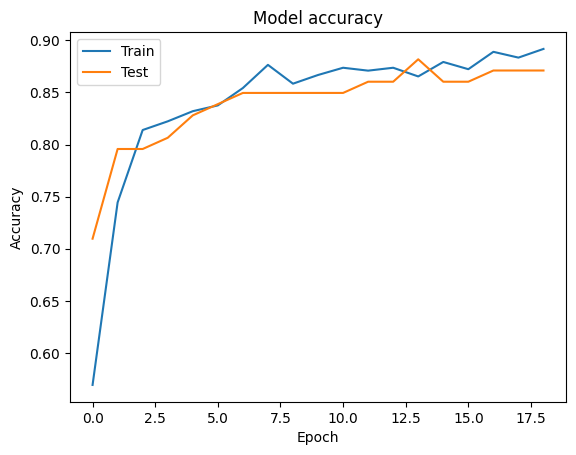

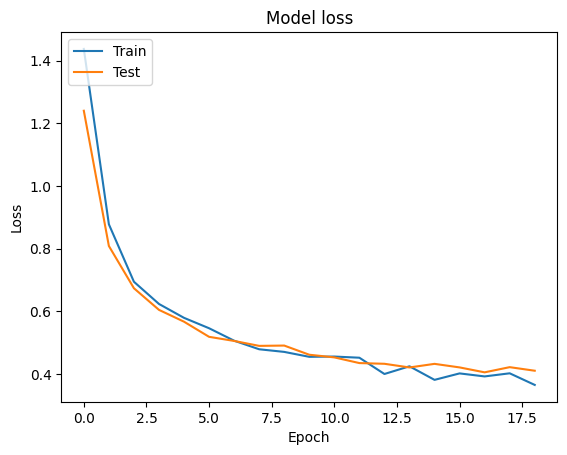

In [108]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [109]:
model.save('../../ML/Recognition/Model/FER_w_CK+_LM_v1.keras')

In [136]:
happy = cv2.imread("C:/Users/User/Desktop/05-12-21-happy-people.jpg")

In [137]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(happy, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

In [138]:
if len(faces) > 0:
    x, y, w, h = faces[0]  # Coordinates of the face
    face_crop = happy[y:y+h, x:x+w]  # Crop the face

    # Resize the face to 48x48
    face_resized = cv2.resize(face_crop, (48, 48))

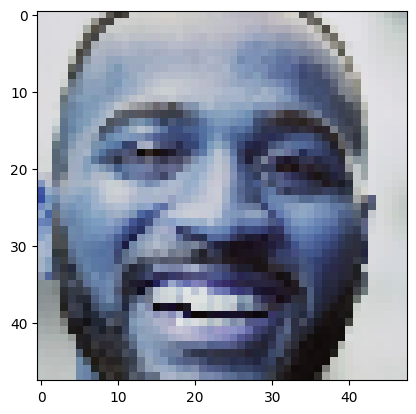

In [140]:
plt.imshow(face_resized, cmap='gray')
plt.show()

In [143]:
image_rgb = cv2.cvtColor(face_resized, cv2.COLOR_BGR2RGB)
results = face_mesh.process(image_rgb)

In [145]:
if results.multi_face_landmarks:
    happy_face = results.multi_face_landmarks[0]
    happy_list = [(landmark.x, landmark.y, landmark.z) for landmark in happy_face.landmark]

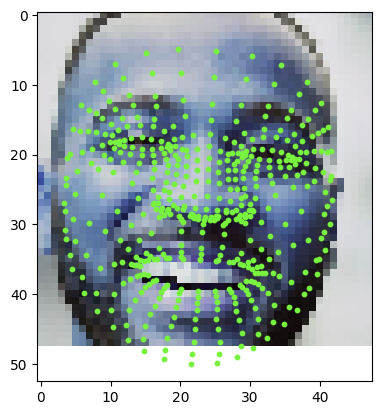

In [149]:
plt.imshow(face_resized, cmap='gray')

# Overlay landmarks on the first image
for landmark in happy_list:
    x, y = landmark[0], landmark[1]

    # Adjust coordinates for the image size (assuming 48x48)
    x *= 48
    y *= 48

    # Plot each landmark
    plt.scatter(x, y, c='#77f23f', s=10)   # Red dot for each landmark

plt.show()

In [154]:
happy_flattened = np.array(happy_list).flatten()
happy_flattened_2d = happy_flattened.reshape(1, -1)
happy_scaled= scaler.fit_transform(happy_flattened_2d)
scaled_1d = happy_scaled.flatten()

In [155]:
emotion_prediction = model.predict(np.array([scaled_1d]))

1/1 [==============================] - 0s 34ms/step


In [156]:
emotion_prediction

array([[0.13608697, 0.07189311, 0.14516869, 0.0912815 , 0.3146056 ,
        0.13717775, 0.10378637]], dtype=float32)